<a href="https://colab.research.google.com/github/satvikcodelegend/legged_robotics/blob/main/singlejointrobotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

dt = 0.2
t = np.arange(0, 16, dt)
N = len(t)


In [ ]:
m1, m2 = 1.0, 0.8
l1, l2 = 1.0, 0.8
lc1, lc2 = 0.5, 0.4
I1, I2 = 0.2, 0.1
g = 9.81

Kp, Kd = 40, 10


In [ ]:
def control_law(state):
    theta1, theta2, dtheta1, dtheta2 = state
    return -Kp*theta1 - Kd*dtheta1


In [ ]:
def dynamics(state):
    theta1, theta2, dtheta1, dtheta2 = state

    M11 = I1 + I2 + m1*lc1**2 + m2*(l1**2 + lc2**2 + 2*l1*lc2*np.cos(theta2))
    M12 = I2 + m2*(lc2**2 + l1*lc2*np.cos(theta2))
    M22 = I2 + m2*lc2**2

    M = np.array([[M11, M12],
                  [M12, M22]])

    h = m2*l1*lc2*np.sin(theta2)
    C = np.array([[-2*h*dtheta2, -h*dtheta2],
                  [ h*dtheta1,    0        ]])

    dq = np.array([dtheta1, dtheta2])

    G1 = (m1*lc1 + m2*l1)*g*np.sin(theta1) + m2*lc2*g*np.sin(theta1 + theta2)
    G2 = m2*lc2*g*np.sin(theta1 + theta2)
    G = np.array([G1, G2])

    tau = np.array([control_law(state), 0.0])

    ddq = np.linalg.solve(M, tau - C @ dq - G)

    return np.array([dtheta1, dtheta2, ddq[0], ddq[1]])


In [ ]:
state = np.zeros((N, 4))
state[0] = [0.5, 0.3, 0.0, 0.0]

for i in range(N-1):
    state[i+1] = state[i] + dynamics(state[i]) * dt


/tmp/ipython-input-2450709224.py:23: RuntimeWarning: overflow encountered in matmul
  ddq = np.linalg.solve(M, tau - C @ dq - G)
/tmp/ipython-input-2450709224.py:23: RuntimeWarning: invalid value encountered in matmul
  ddq = np.linalg.solve(M, tau - C @ dq - G)
/tmp/ipython-input-2450709224.py:4: RuntimeWarning: invalid value encountered in cos
  M11 = I1 + I2 + m1*lc1**2 + m2*(l1**2 + lc2**2 + 2*l1*lc2*np.cos(theta2))
/tmp/ipython-input-2450709224.py:5: RuntimeWarning: invalid value encountered in cos
  M12 = I2 + m2*(lc2**2 + l1*lc2*np.cos(theta2))
/tmp/ipython-input-2450709224.py:11: RuntimeWarning: invalid value encountered in sin
  h = m2*l1*lc2*np.sin(theta2)
/tmp/ipython-input-2450709224.py:17: RuntimeWarning: invalid value encountered in sin
  G1 = (m1*lc1 + m2*l1)*g*np.sin(theta1) + m2*lc2*g*np.sin(theta1 + theta2)
/tmp/ipython-input-2450709224.py:17: RuntimeWarning: invalid value encountered in scalar add
  G1 = (m1*lc1 + m2*l1)*g*np.sin(theta1) + m2*lc2*g*np.sin(theta1 + th

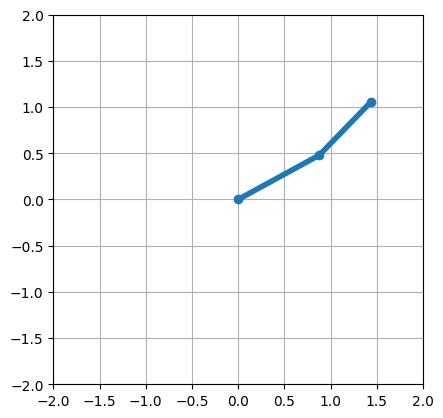

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=4)

def update(frame):
    theta1, theta2 = state[frame, 0], state[frame, 1]

    x0, y0 = 0, 0
    x1 = l1*np.cos(theta1)
    y1 = l1*np.sin(theta1)

    x2 = x1 + l2*np.cos(theta1 + theta2)
    y2 = y1 + l2*np.sin(theta1 + theta2)

    line.set_data([x0, x1, x2], [y0, y1, y2])
    return line,

ani = animation.FuncAnimation(
    fig,
    update,
    frames=N,
    interval=dt*1000,
    blit=True
)

plt.show()


In [ ]:
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(t),
    interval=dt*1000,
    blit=True
)


In [ ]:
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 50  # MB


In [ ]:
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(t),
    interval=dt*1000,
    blit=False
)

from IPython.display import HTML
HTML(ani.to_jshtml())


/tmp/ipython-input-743610200.py:13: RuntimeWarning: invalid value encountered in cos
  x1 = l1*np.cos(theta1)
/tmp/ipython-input-743610200.py:14: RuntimeWarning: invalid value encountered in sin
  y1 = l1*np.sin(theta1)
/tmp/ipython-input-743610200.py:16: RuntimeWarning: invalid value encountered in scalar add
  x2 = x1 + l2*np.cos(theta1 + theta2)
/tmp/ipython-input-743610200.py:17: RuntimeWarning: invalid value encountered in scalar add
  y2 = y1 + l2*np.sin(theta1 + theta2)
